## 5.4 분류 성능평가

분류문제는 회귀 분석과 달리 다양한 성능평가 기준이 필요하다. 이 절에서는 분류문제에 사용되는 다양한 성능평가 기준에 대해 알아본다.

### 사이킷런 패키지에서 지원하는 분류 성능평가 명령

사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공한다. 

* `confusion_matrix(y_true, y_pred)`
* `accuracy_score(y_true, y_pred)`
* `precision_score(y_true, y_pred)`
* `recall_score(y_true, y_pred)`
* `fbeta_score(y_true, y_pred, beta)`
* `f1_score(y_true, y_pred)`
* `classfication_report(y_true, y_pred)`
* `roc_curve`
* `auc`

### 분류결과표 

분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다.
정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.


| <span/> | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|------|------|------|------|
| 정답 클래스 0 | <small>정답 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>정답 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>정답 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 정답 클래스 1 | <small>정답 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>정답 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>정답 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 정답 클래스 2 | <small>정답 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>정답 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>정답 클래스가 2, 예측 클래스가 2인 표본의 수</small> |

예를 들어 정답인 y값 `y_true`와 분류 모형이 예측한 값 `y_pred`가 다음과 같다고 하자.

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

이 때 분류결과표는 다음과 같아진다. 

In [2]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

첫 행은 실제로 0인 두개의 데이터가 둘 다 정확하게 0으로 예측되었다는 뜻이다. 두번째 행은 실제로 1인 하나의 데이터가 2로 분류되었다는 뜻이다. 마지막 행은 실제로 2인 데이터 3개 중 2개만 정확하게 3으로 분류되었고 하나는 0으로 분류되었다는 뜻이다.

열 기준으로 보면 첫번째 열은 분류 모형이 0이라고 예측한 3개의 데이터 중 2개만 원래 0이었고 하나는 원래 2였다는 뜻이다. 마지막 열은 분류 모형이 2라고 예측한 3개의 데이터 중 2개만 2였고 하나는 1이었다는 의미이다.

### 이진 분류결과표 

클래스가 0과 1 두 종류 밖에 없는 이진 분류의 경우에는 일반적으로 클래스 이름을 양성(Positive)와 음성(Negative)로 표시한다. 이 때의 결과를 나타내는 이진 분류결과표(Binary Confusion Matrix)결과표는 다음과 같다.

| <span/> | 양성이라고 예측  | 음성이라고 예측 | 
|-|-|-|
| 실제 양성 | 양성 예측이 맞음 (True Positive)   |  음성 예측이 틀림 (False Negative) |             
| 실제 음성 | 양성 예측이 틀림 (False Positive)  |  음성 예측이 맞음 (True Negative)   |   

분류 모형의 예측 결과가 맞은 경우, 즉 양성을 양성이라고 예측하거나 음성을 음성이라고 예측한 경우에는 참(True)라고 하고 예측 결과가 틀린 경우, 즉 양성을 음성이라고 예측하거나 음성을 양성이라고 예측한 경우에는 거짓(False)이라고 한다.


### 이진분류 시스템의 예

제품을 생산하는 제조공장에서는 완성된 제품에 대해 품질 테스트를 실시하여 불량품을 찾아내고 찾아낸 불량품은 공장으로 되돌린다(리콜, recall). 이 때 품질 테스트 결과가 양성이면 불량품이라고 예측한 것이고 음성이고 정상제품이라고 예측한 것이다.

* True Positive: 불량품을 불량품이라고 정확하게 예측
* True Negative: 정상제품을 정상제품이라고 정확하게 예측
* False Positive: 불량품을 정상제품이라고 잘못 예측
* False Negative: 정상제품을 불량품이라고 잘못 예측

|    <span />                | 불량품이라고 예측                | 정상제품이라고 예측                         | 
|--------------------|------------------------|---------------------------------|
| 실제로 불량품    | True Positive            |  False Negative                   |             
| 실제로 정상제품  | False Positive            |  True Negative                    |   

암(cancer, 악성종양)을 검진할 때도 암에 걸린 것을 양성(陽性, positive)이라하고 걸리지 않은 것을 음성이라고 한다. 종양(tumar)의 양성(良性, benign), 악성(惡性, malignant) 용어와 다르다는 점에 주의하라.

* True Positive: 암을 암이라고 정확하게 예측
* True Negative: 암이 아닌것을 암이 아니라고 정확하게 예측
* False Positive: 암을 암이 아니라고 잘못 예측
* False Negative: 암이 아닌것을 암이라고 잘못 예측

|   <span/>                  | 암이라고 예측                | 암이 아니라고 예측                         | 
|--------------------|------------------------|---------------------------------|
| 실제로 암   | True Positive            |  False Negative                   |             
| 실제로 암이 아님  | False Positive            |  True Negative                    |   

FDS(Fraud Detection System)는 금융 거래, 회계 장부 등에서 잘못된 거래, 사기거래를 찾아내는 시스템을 말한다. FDS의 예측 결과가 양성이면  사기거래라고 예측한 것이고 음성이면 정상거래라고 예측한 것이다. 

* True Positive: 사기를 사기라고 정확하게 예측
* True Negative: 정상을 정상이라고 정확하게 예측
* False Positive: 정상을 사기라고 잘못 예측
* False Negative: 사기를 정상이라고 잘못 예측

|    <span />   | 사기라고 예측                | 정상이라고 예측                         | 
|---------------|------------------------|---------------------------------|
| 실제로 사기  | True Positive            |  False Negative                   |             
| 실제로 정상  | False Positive            |  True Negative                    |   

사이킷런 패키지에서 제공하는 `confusion_matrix` 명령을 사용할 때는 클래스 순서가 0, 1, 2, ... 순서로 출력되기 때문에 위에서 표시한 표와 다를 수 있으므로 주의해야 한다.

In [3]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

`labels` 인수를 사용하면 순서를 사용자가 바꿀 수 있다.

In [4]:
confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[3, 1],
       [0, 2]])

### 평가점수

이진 분류평가표로부터 하나의 평가점수(score)를 계산하여 그 값을 최종적인 기준으로 사용하는 경우가 많다. 이 때도 관점에 따라 다양한 평가점수가 쓰인다.

#### 정확도

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
 
$$ \text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN} $$

#### 정밀도

정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.
 
$$\text{precision} = \dfrac{TP}{TP + FP}$$

#### 재현율

재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.
 
$$\text{recall} = \dfrac{TP}{TP + FN}$$

#### 위양성율

위양성율(fall-out)은 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율을 말한다. 다른 평가점수와 달리 낮을수록 좋은 모형이다. FDS의 경우에는 실제로는 정상 거래인데 FDS가 사기 거래라고 예측한 거래의 비율이 된다. FPR(false positive rate)또는 1에서 위양성률의 값을 뺀 값을 특이도(specificity)라고도 한다. 

$$\text{fallout} = \dfrac{FP}{FP + TN}$$

#### F점수

정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$

베타가 1인 경우를 특별히 F1점수라고 한다.

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

사이킷런 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 ``classification_report`` 명령을 제공한다.
이 명령은 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.

In [5]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



위 ``classification_report`` 결과에서 0이라고 예측한 데이터의 75%만 실제로 0이었고 1이라고 예측한 데이터의 33%만 실제로 1이었음을 알 수 있다. 또한 실제 0인 데이터 중의 60%만 0으로 판별되었고 실제 1인 데이터 중의 50%만 1로 판별되었음을 알 수 있다.

다중 클래스 문제의 경우에는 각각의 클래스에 대해 자신을 를 양성 클래스로, 다른 클래스를 음성 클래스로 가정하여 OvR 문제를 풀고 각각에 대해 정밀도, 재현율, 위양성률 등의 평가점수를 구한다. 이렇게 하면 클래스별로 각각 다른 평가점수가 나오므로 이를 하나로 합쳐는 일종의 평균을 구해야 하는데 다음과 같은 여러가지 기준을 사용한다.

* `macro`: 단순평균
* `weighted`: 각 클래스에 속하는 표본의 갯수로 가중평균
* `accuracy`: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.

| <span/> | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|---------|------------|------------|------------|
| 정답 클래스 0 | TP | FP/FN | FP/FN |
| 정답 클래스 1 | FP/FN | TP | FP/FN |
| 정답 클래스 2 | FP/FN | FP/FN | TP |

In [6]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



### ROC 커브

위에서 설명한 각종 평가 점수 중 재현율(recall)과 위양성률(fall-out)은 일반적으로 양의 상관 관계가 있다.

재현율을 높이기 위해서는 양성으로 판단하는 기준(threshold)을 낮추어 약간의 증거만 있어도 양성으로 판단하도록 하면 된다.
그러나 이렇게 되면 음성임에도 양성으로 판단되는 표본 데이터가 같이 증가하게 되어 위양성율이 동시에 증가한다.
반대로 위양성율을 낮추기 위해 양성을 판단하는 기준을 엄격하게 두게 되면 증거 부족으로 음성 판단을 받는 표본 데이터의 수가 같이 증가하므로 재현율이 떨어진다.

<img src="https://datascienceschool.net/upfiles/831d9dfbdcee499c9e32f39831d757f2.png" width="100%">

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화한 것이다.

<img src="https://datascienceschool.net/upfiles/219c35d779eb4eb38be3fa0cc6b9ed38.png" width="100%">

모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별함수(discriminant function)를 가지며 판별함수값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0 이 클래스 판별 기준값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

사이킷런 패키지의 분류모형 클래스는 판별함수값을 계산하는 `decision_function` 메서드를 제공한다. 다음 표는 분류문제를 풀고  `decision_function` 메서드를 이용하여 모든 표본 데이터에 대해 판별함수값을 계산한 다음 계산된 판별함수값이 가장 큰 데이터부터 가장 작은 데이터 순서로 정렬한 것이다.

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


ROC 커브는 이 표를 이용하여 다음과 같이 작성한다.

1. 현재는 0을 기준값(threshold)으로 클래스를 구분하여 판별함수값이 0보다 크면 양성(Positive), 작으면 음성(negative)이 된다.
2. 데이터 분류가 다르게 되도록 기준값을 증가 혹은 감소시킨다. 위의 표에서는 기준값을 0.244729보다 크도록 올리면 6번 데이터는 더이상 양성이 아니다.
3. 기준값을 여러가지 방법으로 증가 혹은 감소시키면서 이를 반복하면 여러가지 다른 기준값에 대해 분류 결과가 달라지고 재현율, 위양성률 등의 성능평가 점수도 달라진다.

기준값 0을 사용하여 이진 분류결과표, 재현율, 위양성율을 계산하면 다음과 같다.

In [8]:
confusion_matrix(y, y_hat, labels=[1, 0])

array([[6, 2],
       [1, 7]])

In [9]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


사이킷런 패키지는 위 과정을 자동화한 `roc_curve` 명령을 제공한다. 인수로는 타겟 y 벡터와 판별함수 벡터(혹은 확률 벡터)를 넣고 결과로는 변화되는 기준값과 그 기준값을 사용했을 때의 재현율과 위양성률을 반환한다.

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.16762769,  2.16762769,  1.03566193,  0.24472855, -0.06301587,
        -0.87838516, -1.02775912, -4.14855612]))

``decision_function`` 메서드를 제공하지 않는 모형은 ``predict_proba`` 명령을 써서 확률을 입력해도 된다.

In [11]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.89730457, 0.89730457, 0.73801211, 0.56087859, 0.48425124,
        0.29351253, 0.26351878, 0.01554183]))

ROC 커브를 시각화화면 다음과 같다. 기준값이 0인 현재의 모형을 점으로 표시하였다.

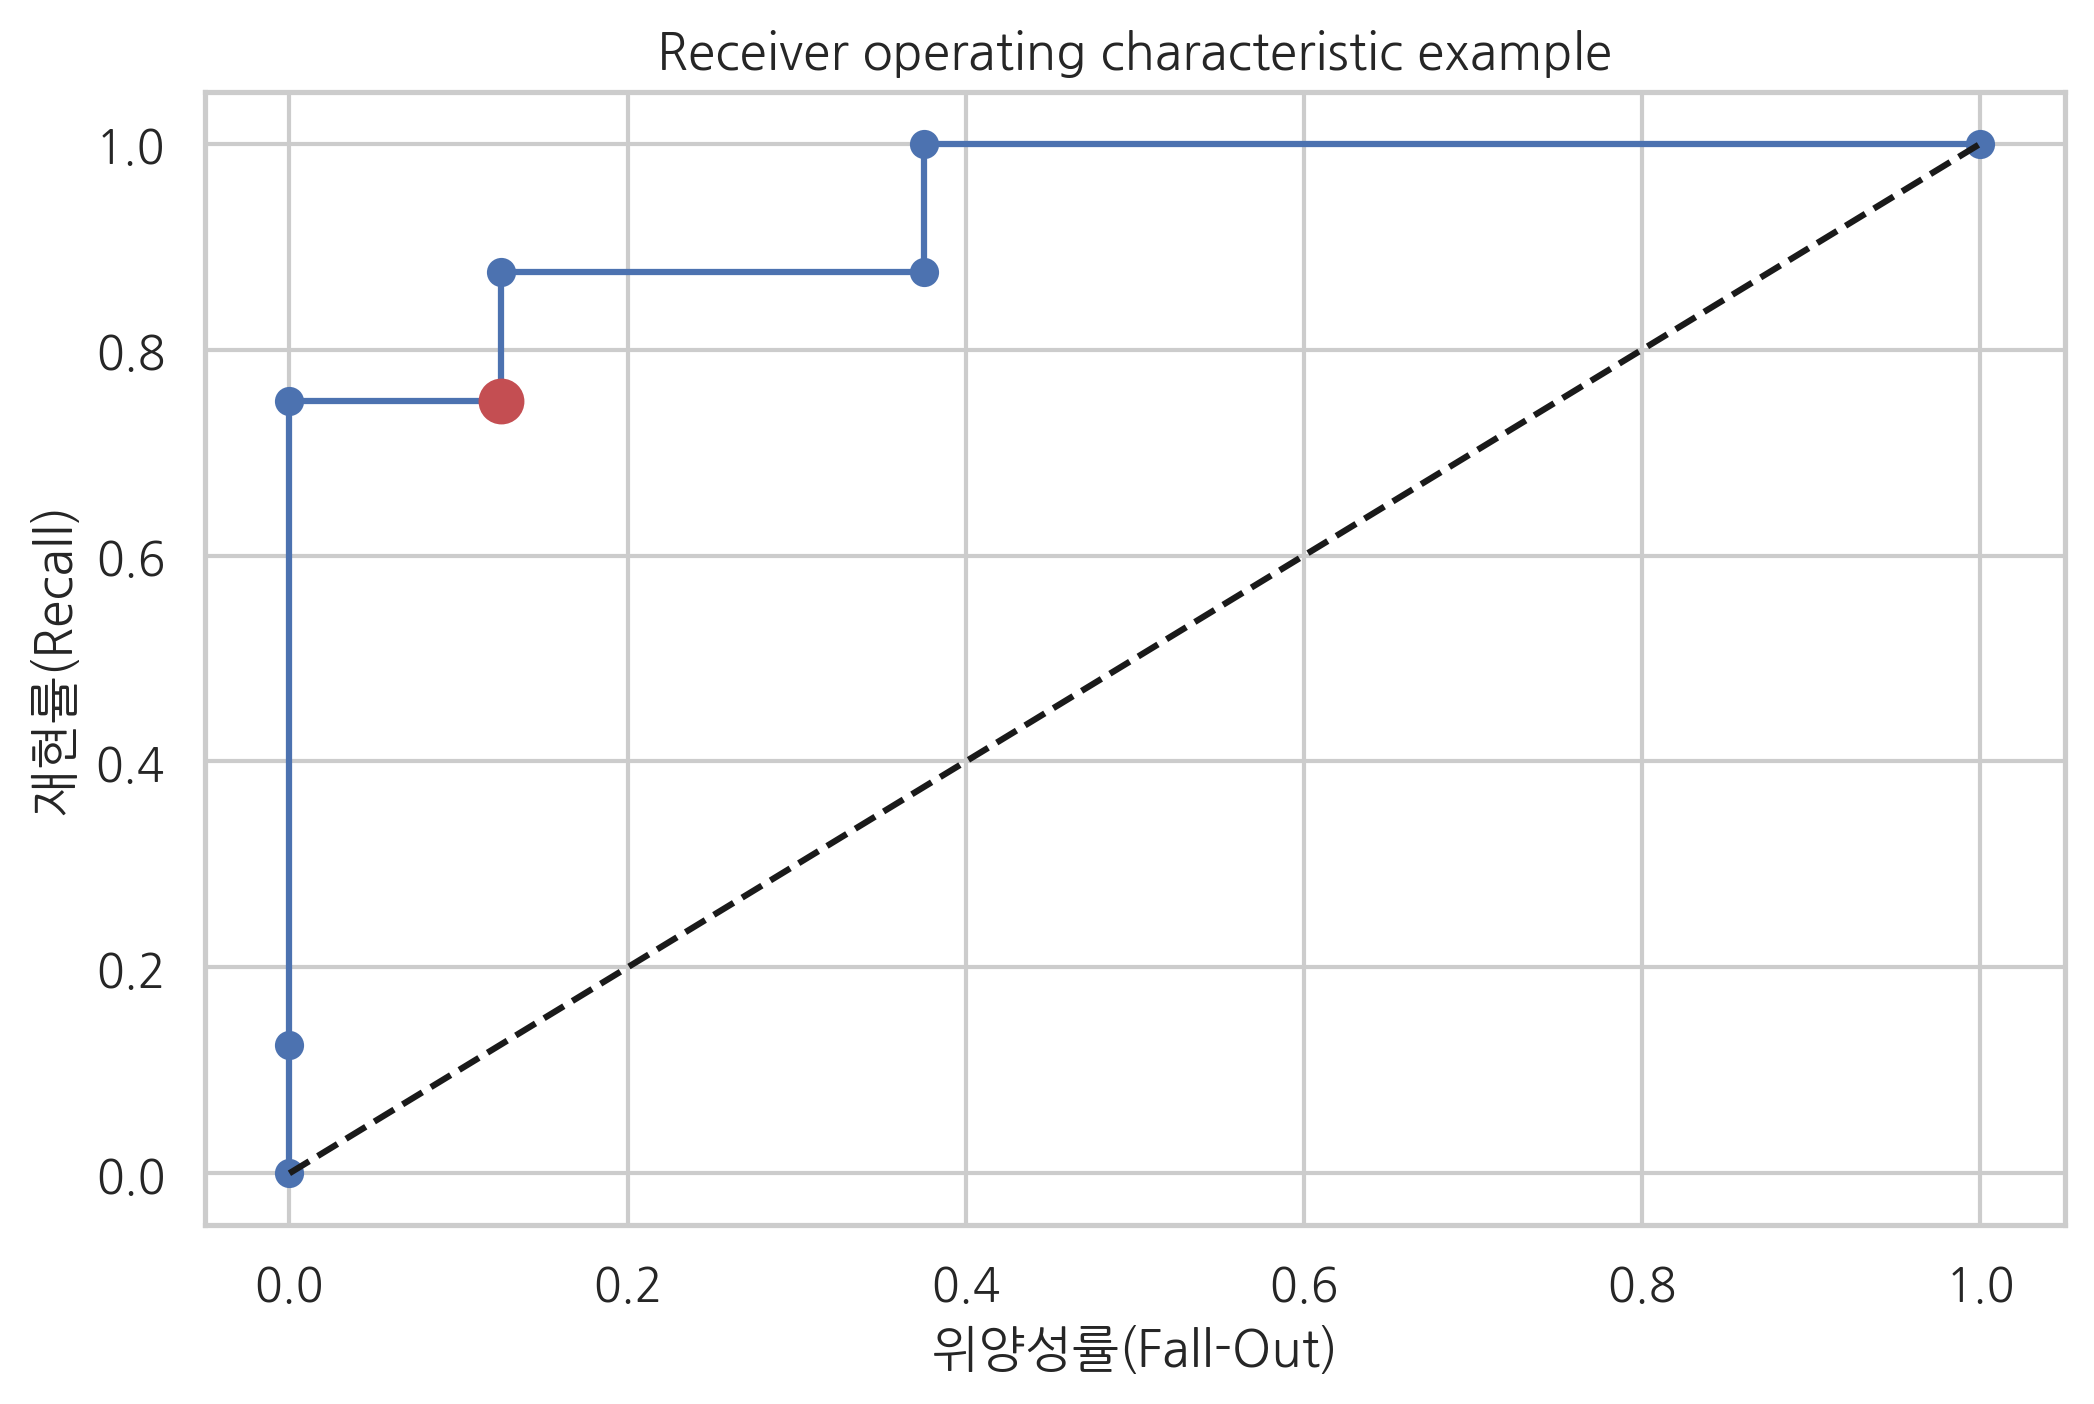

In [12]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

사이킷런 패키지에서 만들어진 모형은 기본적으로 정확도(accuracy)를 최대화하는 모형이다. 
하지만 정확도, 정밀도, 재현도 등의 성능이 동일한 모형도 ROC 커브에서 살펴보면 성능이 달라지는 것을 볼 수 있다.

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

두 모형은 이진 분류결과표로 본 성능이 완전히 같다.

In [14]:
print(confusion_matrix(y, y_hat1))

[[940   3]
 [ 30  27]]


In [15]:
print(confusion_matrix(y, y_hat2))

[[940   3]
 [ 30  27]]


In [16]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [17]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



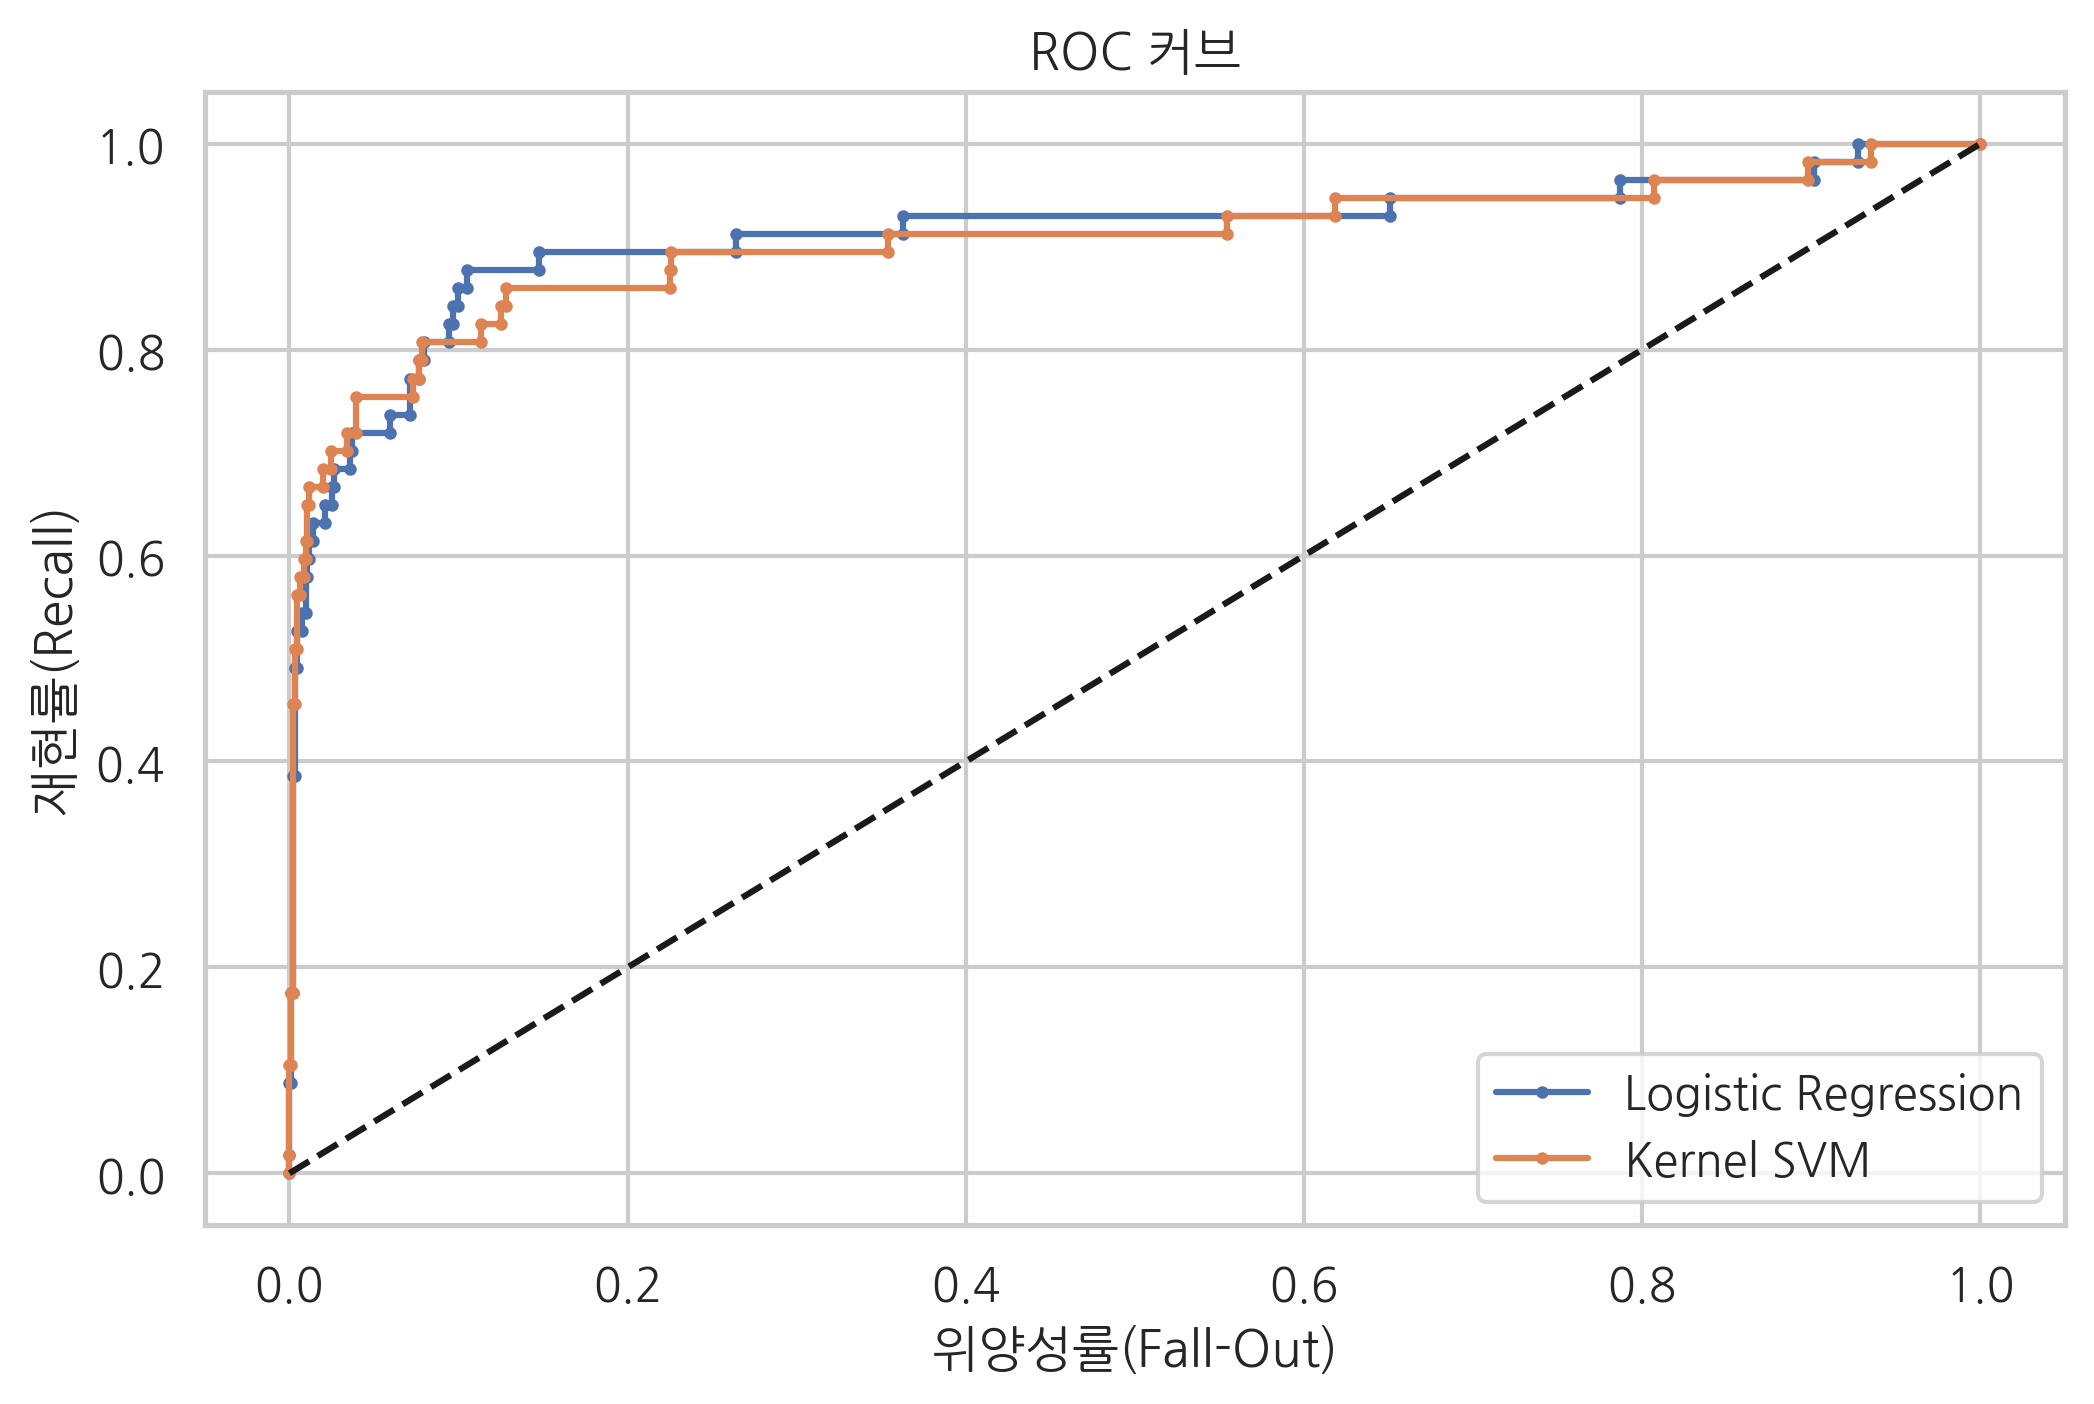

In [18]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()

### AUC 

AUC(Area Under the Curve)는 ROC curve의 면적을 뜻한다. 위양성률값이 같을 때 재현률값이 크거나 재현률값이 같을 때 위양성률값이 작을수록 AUC가 1에 가까운 값이고 좋은 모형이다.

In [19]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112016520622872, 0.9037227214377407)

다중 클래스에 대해서는 정밀도, 재현율을 구하거나 ROC 커브를 그릴 수 없으므로 각각의 클래스에 대해 OvR 문제를 가정하고 각각의 OvR 문제에 대해 ROC 커브를 그린다.

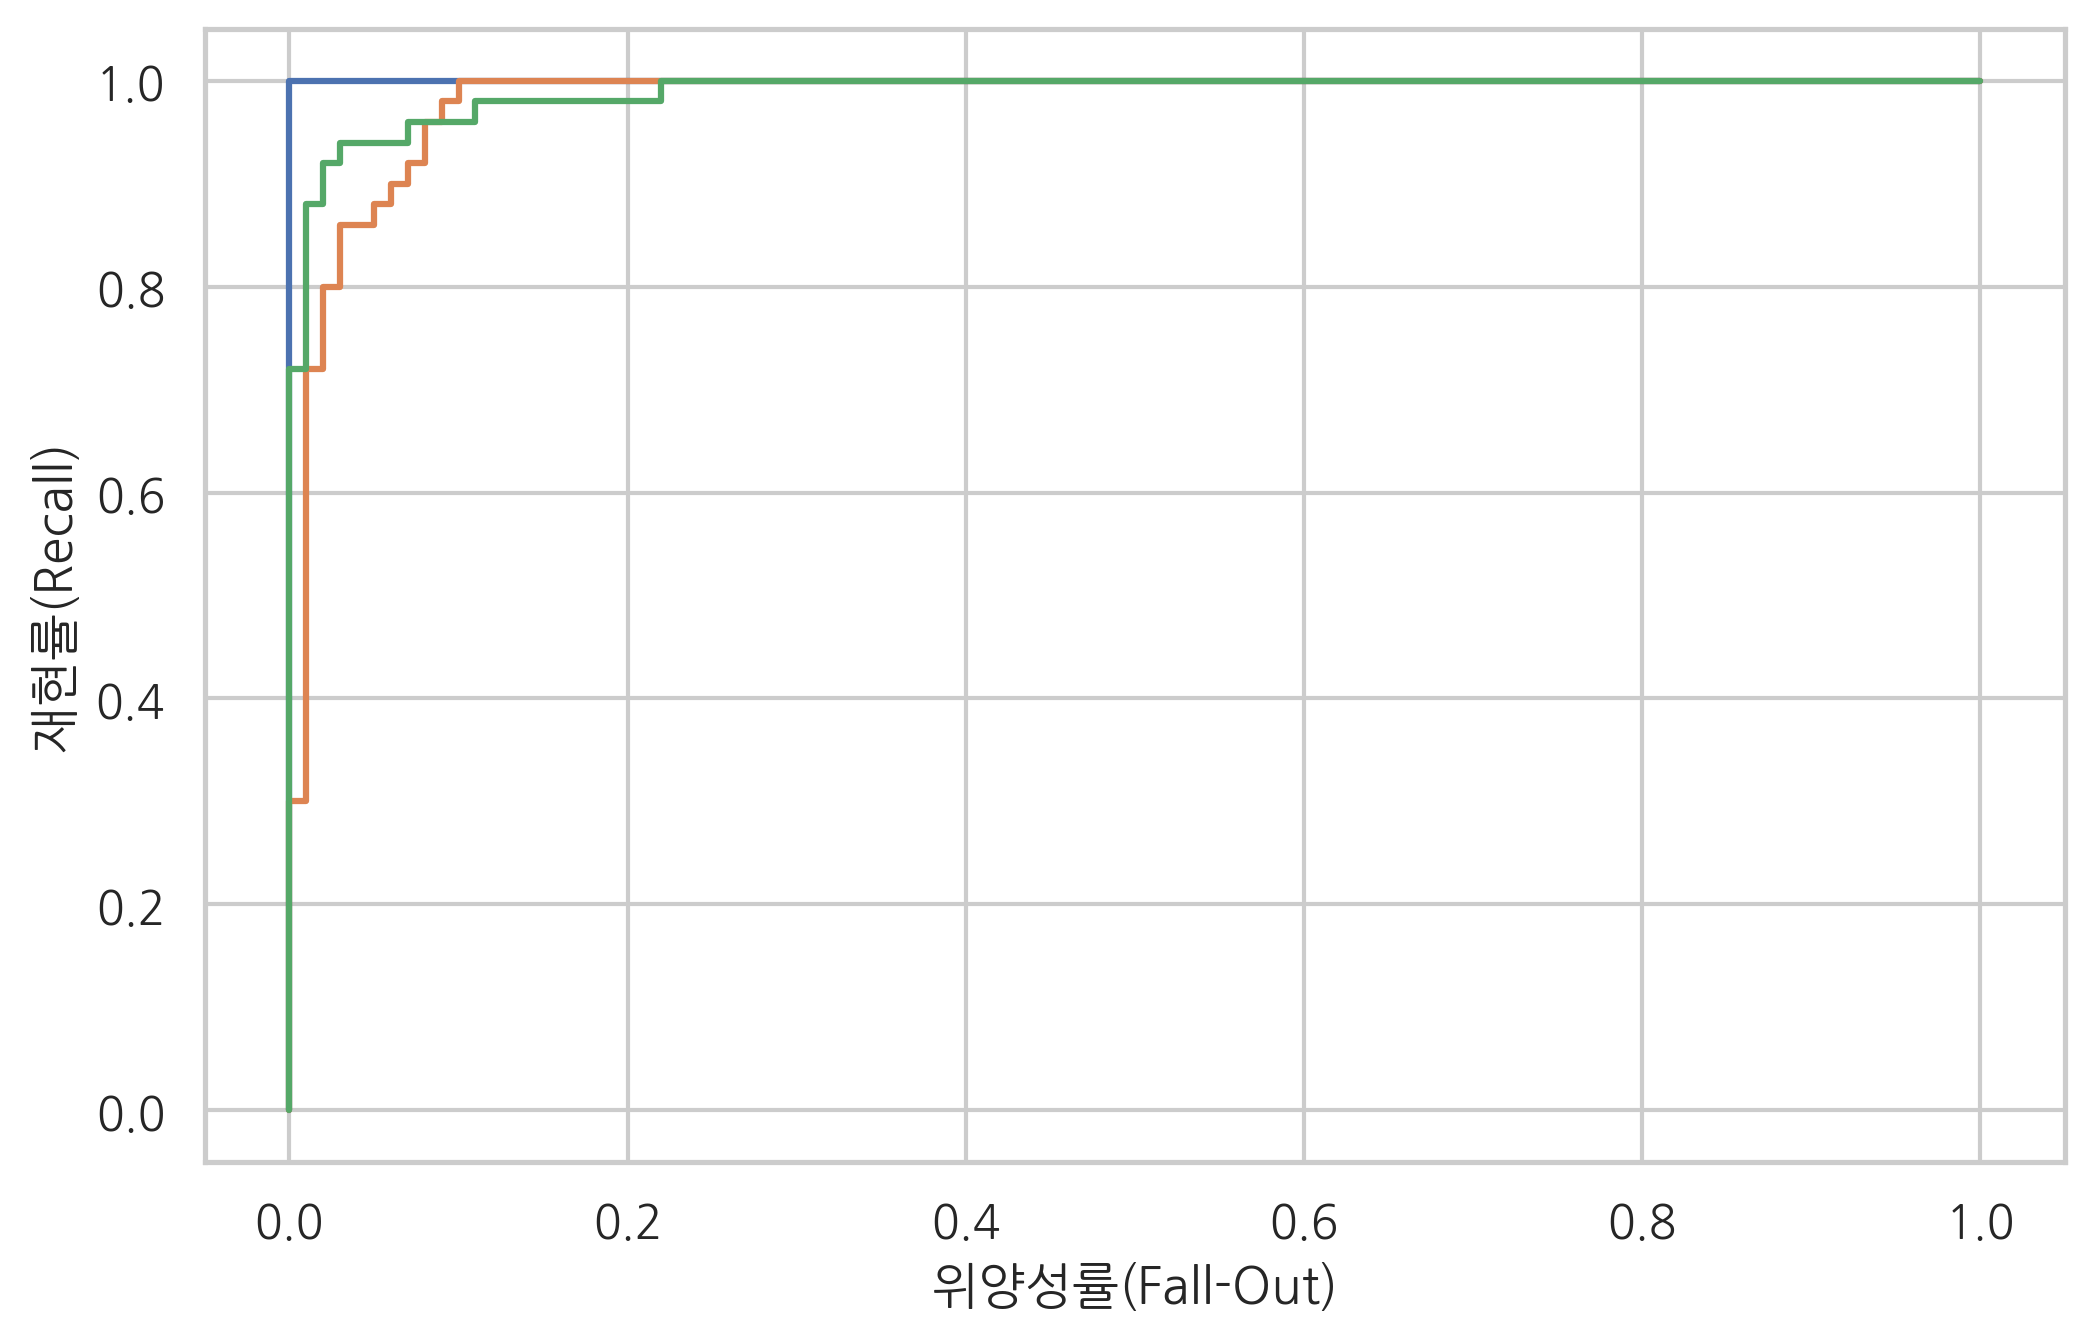

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()